# Data Understanding

In [1]:
import pandas as pd
from pandas.plotting import autocorrelation_plot

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Daten einlesen und Inspektion

In [2]:
# Pfad zur CSV-Datei
file_path = '../data/raw/sickness_table.csv'

# CSV-Datei einlesen
df = pd.read_csv(file_path)

In [3]:
# Die ersten Zeilen anzeigen, um einen Überblick über die Daten zu bekommen
df.head()

,Unnamed: 0,date,n_sick,calls,n_duty,n_sby,sby_need,dafted
0,0,2016-04-01,73,8154.0,1700,90,4.0,0.0
1,1,2016-04-02,64,8526.0,1700,90,70.0,0.0
2,2,2016-04-03,68,8088.0,1700,90,0.0,0.0
3,3,2016-04-04,71,7044.0,1700,90,0.0,0.0
4,4,2016-04-05,63,7236.0,1700,90,0.0,0.0


In [4]:
# Basisinformationen über den Datensatz abrufen
print("\nAllgemeine Informationen zum Datensatz:\n")
df.info()


Allgemeine Informationen zum Datensatz:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1152 non-null   int64  
 1   date        1152 non-null   object 
 2   n_sick      1152 non-null   int64  
 3   calls       1152 non-null   float64
 4   n_duty      1152 non-null   int64  
 5   n_sby       1152 non-null   int64  
 6   sby_need    1152 non-null   float64
 7   dafted      1152 non-null   float64
dtypes: float64(3), int64(4), object(1)
memory usage: 72.1+ KB


In [5]:
# Fehlende Werte prüfen
print("\nAnzahl fehlender Werte je Spalte:\n")
df.isnull().sum()


Anzahl fehlender Werte je Spalte:



Unnamed: 0    0
date          0
n_sick        0
calls         0
n_duty        0
n_sby         0
sby_need      0
dafted        0
dtype: int64

## Erste Erkenntnisse
**Struktur der Daten:**

- Es gibt insgesamt 1.152 Zeilen und 8 Spalten.
- Die Spaltennamen scheinen größtenteils erklärend zu sein, jedoch gibt es eine Unnamed: 0-Spalte, die vermutlich eine Index-Spalte ist und ignoriert werden kann.
- Die Spalte date ist als object eingelesen, was bedeutet, dass sie in ein datetime-Format konvertiert werden sollte.

**Datentypen:**

- Die meisten numerischen Spalten (n_sick, calls, n_duty, n_sby, sby_need, dafted) haben sinnvolle Datentypen (int64 oder float64).
- Für die Spalte date ist es sinnvoll, sie in einen datetime-Datentyp zu konvertieren, um Zeitreihenanalysen durchführen zu können.

**Fehlende Werte:**

- Alle Spalten sind vollständig (es gibt keine fehlenden Werte).

# 2. Basisinformationen

In [6]:
# Unnötige Index-Spalte ignorieren
df = df.drop(columns=['Unnamed: 0'])

In [7]:
# Datentyp von 'date' in datetime umwandeln
df['date'] = pd.to_datetime(df['date'])

# Float-Spalten in int64 umwandeln (calls, sby_need und dafted)
df['calls'] = df['calls'].astype('int64')
df['sby_need'] = df['sby_need'].astype('int64')
df['dafted'] = df['dafted'].astype('int64')


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      1152 non-null   datetime64[ns]
 1   n_sick    1152 non-null   int64         
 2   calls     1152 non-null   int64         
 3   n_duty    1152 non-null   int64         
 4   n_sby     1152 non-null   int64         
 5   sby_need  1152 non-null   int64         
 6   dafted    1152 non-null   int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 63.1 KB


In [9]:
# Spaltennamen ins Deutsche übersetzen
df = df.rename(columns={
    'date': 'Datum',
    'n_sick': 'Anzahl_Krankenstand',
    'calls': 'Anzahl_Notrufe',
    'n_duty': 'Anzahl_im_Dienst',
    'n_sby': 'Anzahl_Ersatzfahrer_Bereitschaft',
    'sby_need': 'Ersatzfahrer_aktiviert',
    'dafted': 'Zusätzliche_Fahrer_erforderlich'
})

In [10]:
# Prüfen auf Duplikate
duplicates = df.duplicated()

# Anzahl der Duplikate ausgeben
num_duplicates = duplicates.sum()
print(f"Anzahl der Duplikate im Datensatz: {num_duplicates}")

# Falls Duplikate vorhanden sind, die Duplikate anzeigen
if num_duplicates > 0:
    print("\nDuplikate im Datensatz:")
    print(df[duplicates])
else:
    print("Es wurden keine Duplikate im Datensatz gefunden.")


Anzahl der Duplikate im Datensatz: 0
Es wurden keine Duplikate im Datensatz gefunden.


# 3. Deskriptive Statistiken

In [11]:
df.describe()

,Datum,Anzahl_Krankenstand,Anzahl_Notrufe,Anzahl_im_Dienst,Anzahl_Ersatzfahrer_Bereitschaft,Ersatzfahrer_aktiviert,Zusätzliche_Fahrer_erforderlich
count,1152,1152.000000,1152.000000,1152.000000,1152.0,1152.000000,1152.000000
mean,2017-10-28 12:00:00,68.808160,7919.531250,1820.572917,90.0,34.718750,16.335938
min,2016-04-01 00:00:00,36.000000,4074.000000,1700.000000,90.0,0.000000,0.000000
25%,2017-01-13 18:00:00,58.000000,6978.000000,1800.000000,90.0,0.000000,0.000000
50%,2017-10-28 12:00:00,68.000000,7932.000000,1800.000000,90.0,0.000000,0.000000
75%,2018-08-12 06:00:00,78.000000,8827.500000,1900.000000,90.0,12.250000,0.000000
max,2019-05-27 00:00:00,119.000000,11850.000000,1900.000000,90.0,555.000000,465.000000
std,NaN,14.293942,1290.063571,80.086953,0.0,79.694251,53.394089


## 1. Anzahl_Krankenstand
- **Durchschnitt:** Der Mittelwert liegt bei etwa 69 Krankenständen pro Tag.
- **Spannweite:** Die Anzahl der Krankenstände reicht von einem Minimum von 36 bis zu einem Maximum von 119.
- **Quartile:** 50 % der Werte liegen zwischen 58 und 78, was zeigt, dass die Anzahl der Krankenstände an den meisten Tagen relativ konstant ist.
- **Standardabweichung:** Die Abweichung von ca. 14 weist auf eine moderate Schwankung hin.
- **Interpretation:** Diese Zahlen bestätigen die Einschätzung, dass die Anzahl der Krankenstände je nach Tag schwanken kann. Die hohen Werte könnten saisonale oder epidemiebedingte Spitzenzeiten (z. B. Grippewellen im Winter) widerspiegeln.
## 2. Anzahl_Notrufe
- **Durchschnitt:** Durchschnittlich gibt es ca. 7.920 Notrufe pro Tag.
- **Spannweite:** Die Anzahl der Notrufe reicht von 4.074 bis 11.850, was auf erhebliche Schwankungen hinweist.
- **Quartile:** 50 % der Werte liegen zwischen 6.978 und 8.827, was einen relativ großen Bereich abdeckt und darauf hinweist, dass die Nachfrage an Notrufen variabel ist.
- **Standardabweichung:** Mit einer Abweichung von etwa 1.290 ist die Anzahl der Notrufe recht volatil.
- **Interpretation:** Die Notrufanzahl kann stark schwanken und könnte auf Wochentage, Feiertage oder saisonale Effekte zurückzuführen sein.
## 3. Anzahl_im_Dienst
- **Durchschnitt:** Im Durchschnitt sind etwa 1.821 Einsatzfahrer im Dienst.
- **Spannweite:** Die Anzahl im Dienst liegt zwischen 1.700 und 1.900, was auf eine geplante Mindest- und Höchstbesetzung hindeutet.
- **Quartile:** 50 % der Werte liegen zwischen 1.800 und 1.900, was zeigt, dass die Anzahl im Dienst nur in geringem Maße variiert.
- **Standardabweichung:** Die geringe Abweichung von 80 deutet auf eine konstante Dienstbesetzung hin.
- **Interpretation:** Die Anzahl der im Dienst befindlichen Einsatzfahrer scheint reguliert und stabil zu sein, unabhängig von der Tageszeit oder saisonalen Schwankungen.
## 4. Anzahl_Ersatzfahrer_Bereitschaft
- **Wert:** Der Wert ist konstant bei 90, was auf die aktuelle Planungsregel hinweist, bei der täglich 90 Fahrer in Bereitschaft sind.
- **Interpretation:** Diese Konstanz bestätigt die Annahme, dass derzeit eine feste Anzahl an Ersatzfahrern vorgehalten wird, was optimiert werden könnte, um auf die variierenden Anforderungen zu reagieren.
## 5. Ersatzfahrer_aktiviert
- **Durchschnitt:** Im Mittel werden täglich etwa 35 der Bereitschaftsfahrer tatsächlich aktiviert.
- **Spannweite:** Die Werte reichen von 0 bis zu einem Maximum von 555 aktivierten Fahrern, was auf erhebliche Schwankungen hinweist.
- **Quartile:** Für 75 % der Tage liegt der Wert bei 0, was zeigt, dass an vielen Tagen keine zusätzlichen Fahrer benötigt werden.
- **Standardabweichung:** Eine Abweichung von ca. 80 zeigt, dass die Anzahl aktivierter Ersatzfahrer stark variieren kann.
- **Interpretation:** Die hohe Variabilität deutet auf eine unvorhersehbare Bedarfsstruktur hin, wobei in Spitzenzeiten deutlich mehr Ersatzfahrer benötigt werden könnten.
## 6. Zusätzliche_Fahrer_erforderlich
- **Durchschnitt:** Im Mittel müssen täglich etwa 16 zusätzliche Fahrer aktiviert werden, wenn die Bereitschaftsfahrer nicht ausreichen.
- **Spannweite:** Die Anzahl der zusätzlichen Fahrer reicht von 0 bis 465, was auf extreme Engpässe an manchen Tagen hinweist.
- **Quartile:** Für 75 % der Tage ist der Wert 0, was darauf hindeutet, dass diese zusätzliche Aktivierung nur gelegentlich erforderlich ist.
- **Standardabweichung:** Die Abweichung von etwa 53 zeigt, dass die Notwendigkeit für zusätzliche Fahrer stark schwanken kann.
- **Interpretation:** Die hohen Maximalwerte und Schwankungen deuten darauf hin, dass an bestimmten Tagen erheblich mehr Personal benötigt wird, als ursprünglich geplant – eine Herausforderung für die aktuelle Planungsstrategie.

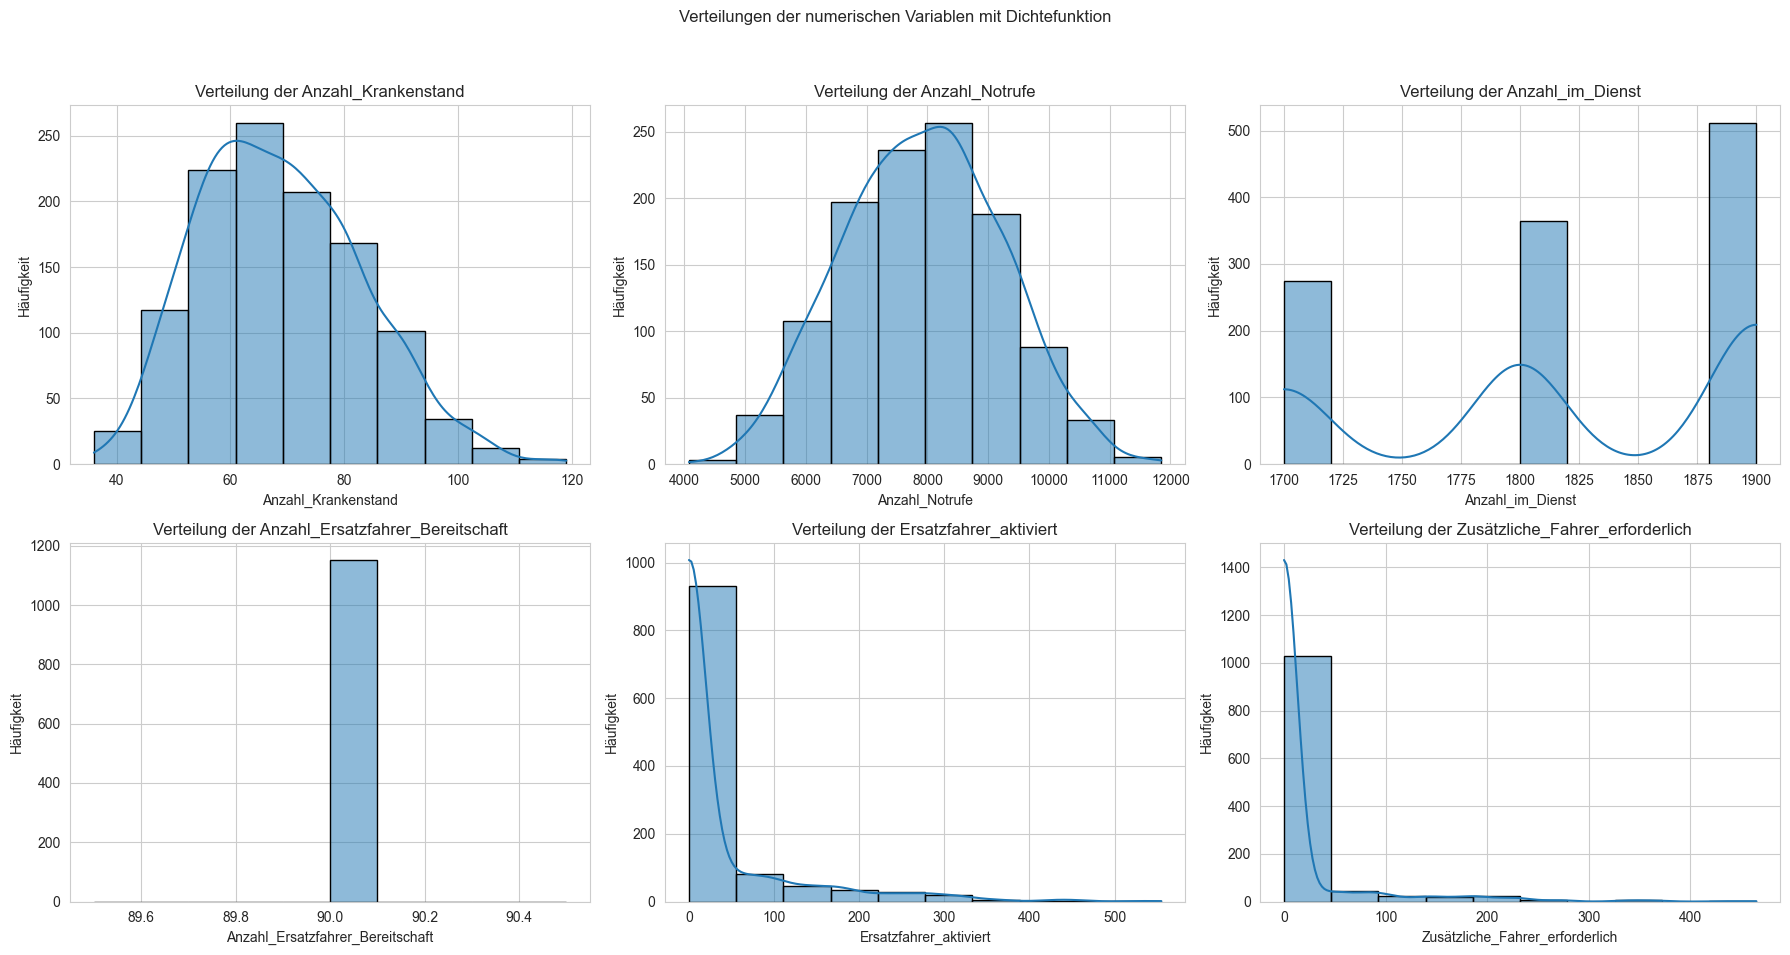

In [12]:
# Erstellen von Verteilungsdiagrammen mit Density-Kurven in einem 3x2-Layout
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Verteilungen der numerischen Variablen mit Dichtefunktion')

# Durch die numerischen Spalten iterieren und Verteilungsdiagramme erstellen
numeric_columns = ['Anzahl_Krankenstand', 'Anzahl_Notrufe', 'Anzahl_im_Dienst', 
                   'Anzahl_Ersatzfahrer_Bereitschaft', 'Ersatzfahrer_aktiviert', 
                   'Zusätzliche_Fahrer_erforderlich']

for i, column in enumerate(numeric_columns):
    row = i // 3
    col = i % 3
    sns.histplot(df[column], kde=True, bins=10, edgecolor='black', ax=axes[row, col])
    axes[row, col].set_title(f'Verteilung der {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Häufigkeit')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 1. Anzahl_Krankenstand
- **Verteilung:** Die Verteilung zeigt eine leichte Schiefe nach rechts, was bedeutet, dass die meisten Krankenstandszahlen in einem Bereich von etwa 50 bis 80 liegen, mit einigen Ausreißern bis etwa 120.
- **Dichtekurve:** Die Dichtekurve zeigt eine relativ breite Verteilung, was auf die Varianz bei Krankenständen hinweist. Dies könnte saisonale Schwankungen widerspiegeln, beispielsweise höhere Krankenstände im Winter.
## 2. Anzahl_Notrufe
- **Verteilung:** Die Notrufanzahl zeigt eine annähernd normale Verteilung, zentriert um den Mittelwert von ca. 8.000.
- **Dichtekurve:** Die symmetrische Form der Dichtekurve deutet darauf hin, dass die meisten Notrufzahlen um diesen Durchschnittswert schwanken. Die Verteilung hat jedoch auch lange Enden, was auf gelegentlich hohe oder niedrige Notrufzahlen hinweist, möglicherweise an Wochenenden oder Feiertagen.
## 3. Anzahl_im_Dienst
- **Verteilung:** Die Verteilung zeigt eine klare Gruppierung der Werte bei 1700, 1800 und 1900, was auf festgelegte Personalstärken hinweist.
- **Dichtekurve:** Diese Verteilung und die Peaks bei den jeweiligen Personalstärken deuten auf ein kontrolliertes, geplantes System hin, in dem eine festgelegte Anzahl von Fahrern pro Tag im Dienst ist. Es zeigt kaum Varianz, da die Personalstärke für Notrufe festgelegt und stabil bleibt.
## 4. Anzahl_Ersatzfahrer_Bereitschaft
- **Verteilung:** Diese Variable ist konstant bei 90, was im Diagramm als eine einzige Säule dargestellt wird.
- **Interpretation:** Da die Anzahl der Ersatzfahrer in Bereitschaft konstant ist, gibt es hier keine Varianz. Dies unterstützt die Annahme, dass derzeit eine statische Planung verwendet wird, die unabhängig von tages- oder saisonalen Schwankungen ist.
## 5. Ersatzfahrer_aktiviert
- **Verteilung:** Die meisten Werte liegen im unteren Bereich, wobei die Mehrzahl der Tage nahe bei 0 Ersatzfahrern liegt, die tatsächlich aktiviert werden. Es gibt jedoch eine deutliche Schiefe nach rechts mit Ausreißern bis zu über 500.
- **Dichtekurve:** Die Verteilung weist darauf hin, dass die Ersatzfahrer nur gelegentlich in größerer Anzahl aktiviert werden. Dies deutet auf eine hohe Varianz in der Notwendigkeit für Ersatzfahrer hin, abhängig von der Tageszeit, dem Notrufvolumen und möglicherweise anderen Faktoren.
## 6. Zusätzliche_Fahrer_erforderlich
- **Verteilung:** Diese Variable zeigt ebenfalls eine starke Schiefe nach rechts. Die meisten Werte sind nahe bei 0, aber es gibt einige Tage, an denen über 400 zusätzliche Fahrer erforderlich waren.
- **Dichtekurve:** Diese Verteilung weist auf kritische Tage hin, an denen die festgelegte Anzahl der Ersatzfahrer nicht ausgereicht hat und zusätzliche Fahrer benötigt wurden. Diese hohen Spitzen könnten durch unerwartete Ereignisse oder saisonale Schwankungen verursacht werden, die mehr Personal erforderlich machen.

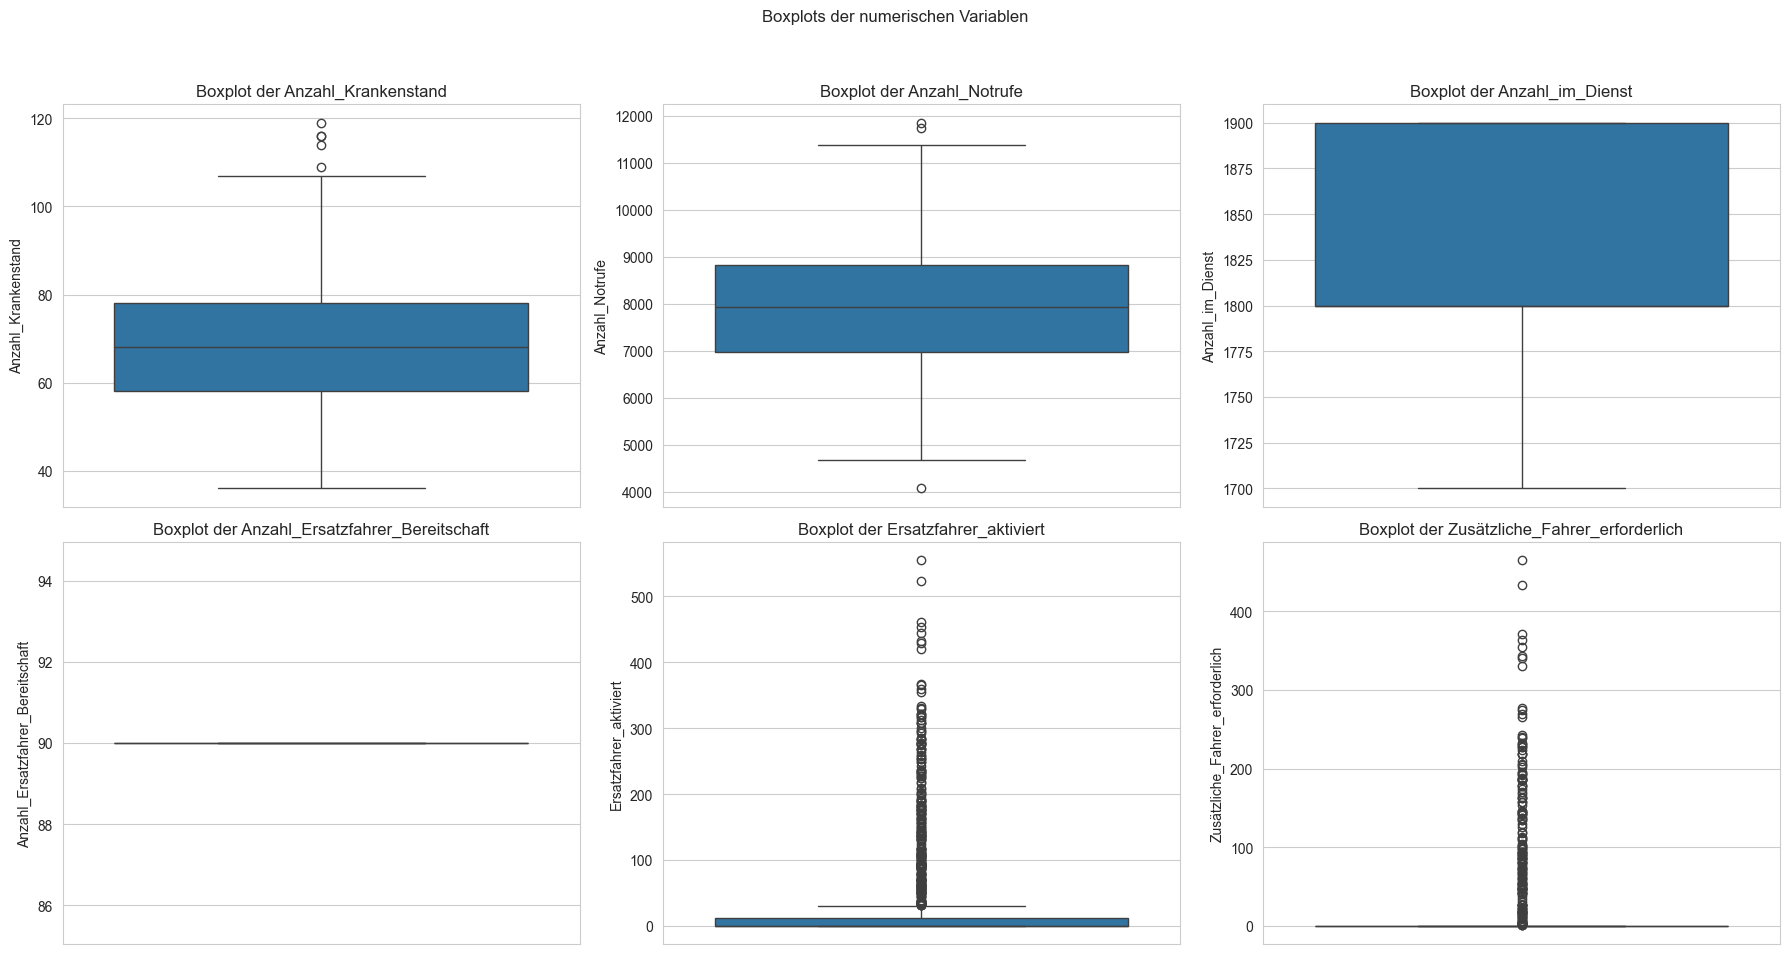

In [13]:
# Erstellen von Boxplots für alle numerischen Spalten in einem 3x2-Layout
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Boxplots der numerischen Variablen')

# Durch die numerischen Spalten iterieren und Boxplots erstellen
numeric_columns = ['Anzahl_Krankenstand', 'Anzahl_Notrufe', 'Anzahl_im_Dienst', 
                   'Anzahl_Ersatzfahrer_Bereitschaft', 'Ersatzfahrer_aktiviert', 
                   'Zusätzliche_Fahrer_erforderlich']

for i, column in enumerate(numeric_columns):
    row = i // 3
    col = i % 3
    sns.boxplot(data=df, y=column, ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot der {column}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Anzahl_Krankenstand:
- Die Boxplot zeigt einige Ausreißer über 90, was auf Tage mit ungewöhnlich hohen Krankenständen hinweist.
- Der Interquartilsabstand (IQR) ist relativ breit, was auf eine gewisse Variabilität bei den Krankenständen hindeutet. Die meisten Werte liegen zwischen etwa 60 und 80.
- 
## Anzahl_Notrufe:
- Die meisten Notrufwerte liegen zwischen etwa 7000 und 9000, was durch den IQR bestätigt wird.
- Es gibt Ausreißer am oberen Ende (über 11.000) und einen kleinen am unteren Ende, was auf gelegentliche Spitzen und Tiefen in der Notrufanzahl hinweist.
- 
## Anzahl_im_Dienst:
- Der Boxplot zeigt eine klare Gruppierung der Werte bei 1700, 1800 und 1900, ohne Ausreißer. Dies deutet auf eine geplante und stabilisierte Anzahl an Dienstfahrern hin.

## Anzahl_Ersatzfahrer_Bereitschaft:
- Der Boxplot ist eine Linie, was darauf hinweist, dass dieser Wert konstant bei 90 liegt. Es gibt hier keinerlei Variabilität, was die starren Planungsprozesse widerspiegelt.

## Ersatzfahrer_aktiviert:
- Die Verteilung ist stark rechtsschief mit zahlreichen Ausreißern, die über 100 aktivierte Fahrer hinausgehen und in Extremfällen sogar über 500.
- Die meisten Tage benötigen keine oder nur wenige aktivierte Ersatzfahrer, aber es gibt gelegentliche Tage mit einem sehr hohen Bedarf.
- 
## Zusätzliche_Fahrer_erforderlich:
- Ähnlich wie bei den „Ersatzfahrer_aktiviert“ zeigt der Boxplot zahlreiche Ausreißer, was auf Tage hinweist, an denen die Anzahl der zusätzlichen Fahrer signifikant über dem Durchschnitt liegt.
- Die Werte konzentrieren sich im unteren Bereich, mit gelegentlichen extremen Anforderungen, was möglicherweise auf unvorhersehbare Notfälle oder saisonale Schwankungen hindeutet.

# 4. Saisonale Trends

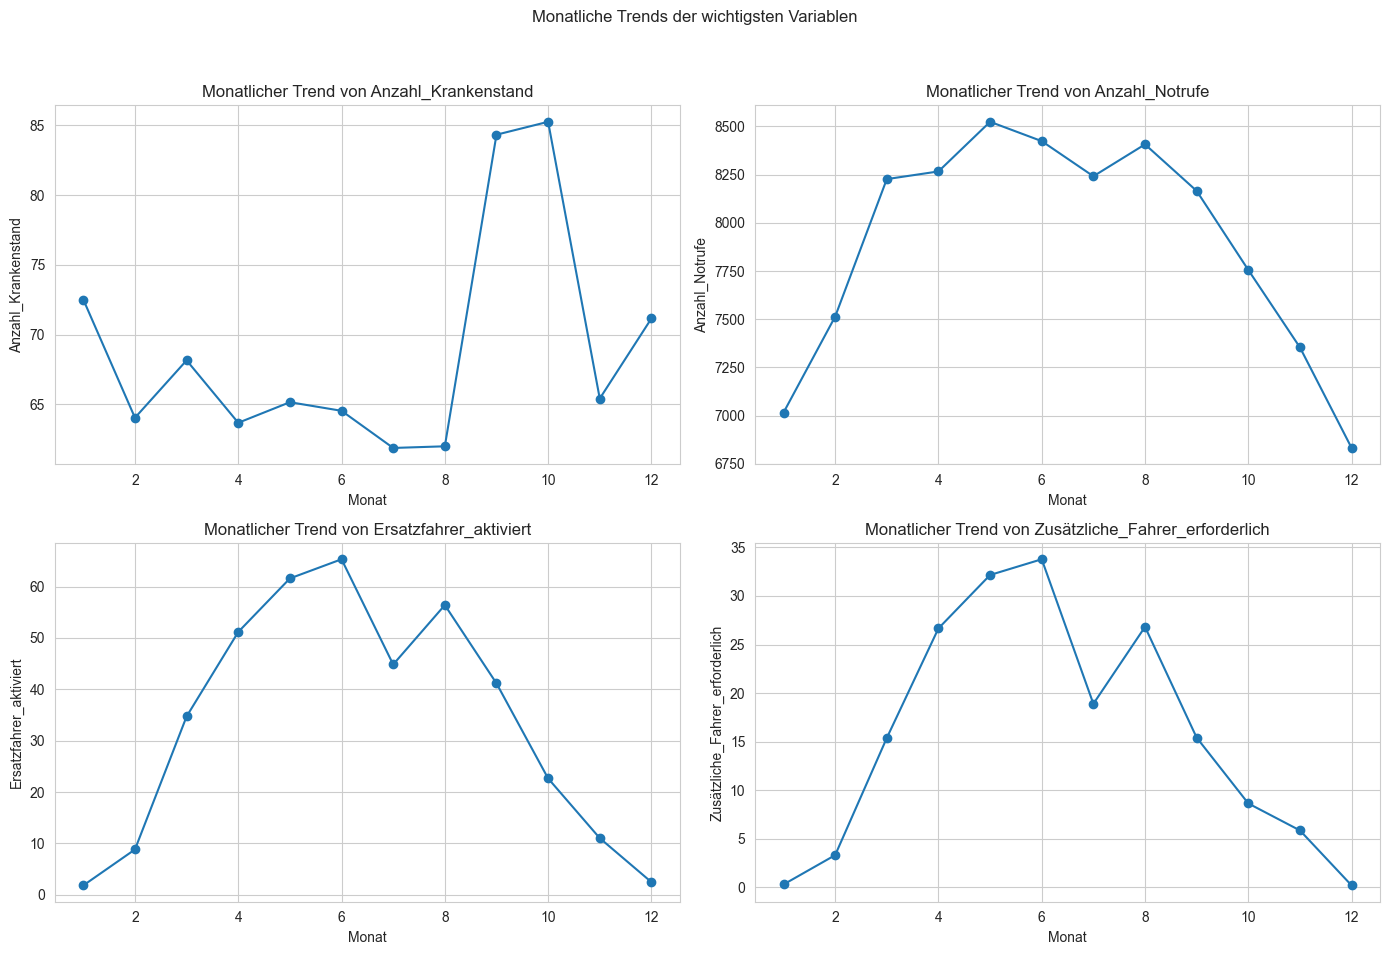

In [14]:
# Monat und Wochentag aus der Datum-Spalte extrahieren
df['Monat'] = df['Datum'].dt.month
df['Wochentag'] = df['Datum'].dt.dayofweek  # Montag=0, Sonntag=6

# 1. Monatliche Trends analysieren
monthly_trends = df.groupby('Monat').mean()

# Erstellen von Liniendiagrammen für monatliche Trends
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Monatliche Trends der wichtigsten Variablen')

variables = ['Anzahl_Krankenstand', 'Anzahl_Notrufe', 'Ersatzfahrer_aktiviert', 'Zusätzliche_Fahrer_erforderlich']
for i, var in enumerate(variables):
    row = i // 2
    col = i % 2
    axes[row, col].plot(monthly_trends.index, monthly_trends[var], marker='o')
    axes[row, col].set_title(f'Monatlicher Trend von {var}')
    axes[row, col].set_xlabel('Monat')
    axes[row, col].set_ylabel(var)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 1. Anzahl_Krankenstand
- **Beobachtungen:** Die Krankenstände zeigen im September und Oktober deutliche Spitzen. Es könnte sein, dass zu dieser Zeit saisonale Krankheiten oder Urlaubsengpässe zu vermehrten Ausfällen führen.
- **Deutung:** Dieser Anstieg im Spätsommer könnte auf Faktoren wie Urlaubssaison oder saisonale Krankheiten zurückzuführen sein. Eine Erhöhung der Bereitschaft in diesen Monaten könnte sinnvoll sein.
## 2. Anzahl_Notrufe
- **Beobachtungen:** Die Notrufzahlen steigen vom Frühling bis in den Sommer hinein an und erreichen im Mai und Juni ihren Höhepunkt. Ab August nehmen die Notrufe wieder kontinuierlich ab und sind im Dezember am niedrigsten.
- **Deutung:** Die höheren Notrufzahlen im Sommer könnten auf verschiedene Faktoren zurückzuführen sein, wie etwa mehr Aktivität im Freien, höhere Unfallgefahr oder Hitzeperioden. Das Notrufvolumen sinkt jedoch im Winter, was möglicherweise auf weniger Outdoor-Aktivitäten und mehr Ruhephasen zurückzuführen ist.
## 3. Ersatzfahrer_aktiviert
- **Beobachtungen:** Der Bedarf an aktivierten Ersatzfahrern folgt einem ähnlichen Muster wie die Notrufe und erreicht von Mai bis August den Höhepunkt, bevor er im Herbst und Winter abnimmt.
- **Deutung:** Die Korrelation mit den Notrufzahlen zeigt, dass ein höheres Notrufaufkommen zu einem größeren Bedarf an Ersatzfahrern führt. Daher wäre eine dynamische Planung, die den Sommer als Spitzenzeit berücksichtigt, sinnvoll.
## 4. Zusätzliche_Fahrer_erforderlich
- **Beobachtungen:** Die Anzahl der zusätzlichen Fahrer zeigt ein sehr ähnliches Muster wie die aktivierten Ersatzfahrer, mit einem klaren Höhepunkt im Frühjahr und Sommer und einer starken Abnahme im Herbst und Winter.
- **Deutung:** Diese Parallelen zu den Notruf- und Ersatzfahrertrends bestätigen, dass in der Sommerzeit (April bis August) verstärkt zusätzliche Ressourcen benötigt werden. Die Werte fallen im Herbst und Winter deutlich ab, was zeigt, dass in diesen Zeiten die geplante Kapazität oft ausreicht.

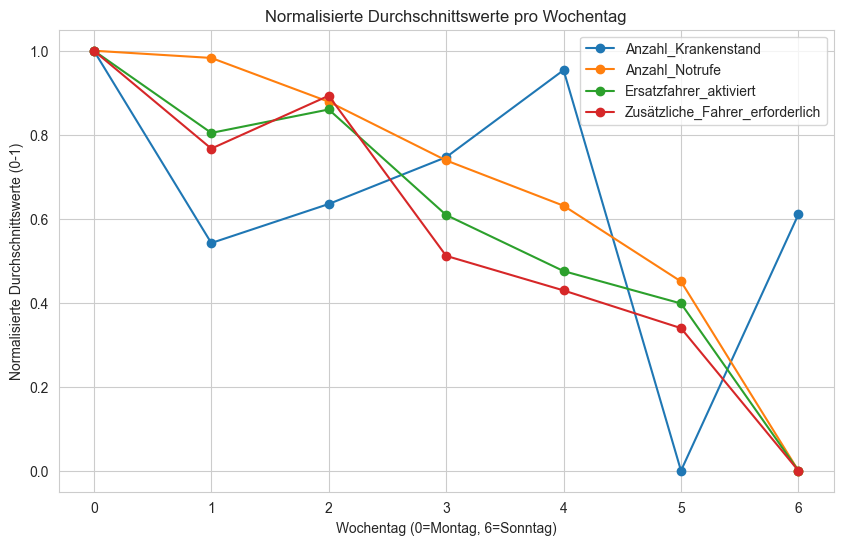

In [15]:
# Wochentags-Trends analysieren
weekly_trends = df.groupby('Wochentag').mean()

# Normalisieren der Wochentagstrends (alle Werte zwischen 0 und 1 skalieren)
weekly_trends_normalized = weekly_trends.copy()
for column in weekly_trends.columns:
    weekly_trends_normalized[column] = (weekly_trends[column] - weekly_trends[column].min()) / (weekly_trends[column].max() - weekly_trends[column].min())

# Plot der normalisierten Durchschnittswerte pro Wochentag
fig, ax = plt.subplots(figsize=(10, 6))
for var in variables:
    ax.plot(weekly_trends_normalized.index, weekly_trends_normalized[var], marker='o', label=var)

ax.set_title('Normalisierte Durchschnittswerte pro Wochentag')
ax.set_xlabel('Wochentag (0=Montag, 6=Sonntag)')
ax.set_ylabel('Normalisierte Durchschnittswerte (0-1)')
ax.legend()
plt.show()

## 1. Anzahl_Krankenstand (blau)
- **Trend:** Die Krankenstände sind am Montag am höchsten und nehmen bis Donnerstag stetig ab, bevor sie am Freitag noch einmal ansteigen und am Wochenende (Samstag und Sonntag) einen Tiefpunkt erreichen.
- **Deutung:** Dies könnte darauf hindeuten, dass sich mehr Personen nach dem Wochenende krankmelden und die Zahl der Krankenstände im Laufe der Woche sinkt. Das Wochenende ist möglicherweise weniger belastend, was die Krankenstände niedrig hält.
## 2. Anzahl_Notrufe (orange)
- **Trend:** Die Notrufzahlen sind am Montag am höchsten und nehmen im Laufe der Woche kontinuierlich ab, wobei der niedrigste Wert am Sonntag erreicht wird.
- **Deutung:** Die höheren Notrufzahlen zu Beginn der Woche könnten auf eine erhöhte Aktivität und Anforderungen zu Wochenbeginn hinweisen, möglicherweise bedingt durch Arbeits- oder Verkehrsunfälle. Das geringere Notrufaufkommen am Wochenende könnte auf weniger Verkehr und Aktivitäten zurückzuführen sein.
## 3. Ersatzfahrer_aktiviert (grün)
- **Trend:** Der Bedarf an aktivierten Ersatzfahrern folgt grob dem Muster der Notrufe, mit einem Höchststand am Montag und einem stetigen Rückgang bis Sonntag.
- **Deutung:** Da die Ersatzfahrer bei Engpässen aktiviert werden, spiegelt der Trend den Verlauf der Notrufe wider. An Tagen mit höherem Notrufaufkommen wird auch mehr zusätzliches Personal benötigt.
## 4. Zusätzliche_Fahrer_erforderlich (rot)
- **Trend:** Ähnlich wie die aktivierten Ersatzfahrer zeigt auch diese Variable den höchsten Wert am Montag und den niedrigsten am Sonntag, wobei sie im Laufe der Woche stetig abnimmt.
- **Deutung:** Dieser Trend deutet darauf hin, dass zu Wochenbeginn häufiger zusätzliche Fahrer benötigt werden, um die Nachfrage zu decken, während zum Wochenende hin der Bedarf abnimmt.

# 5. Korrelation

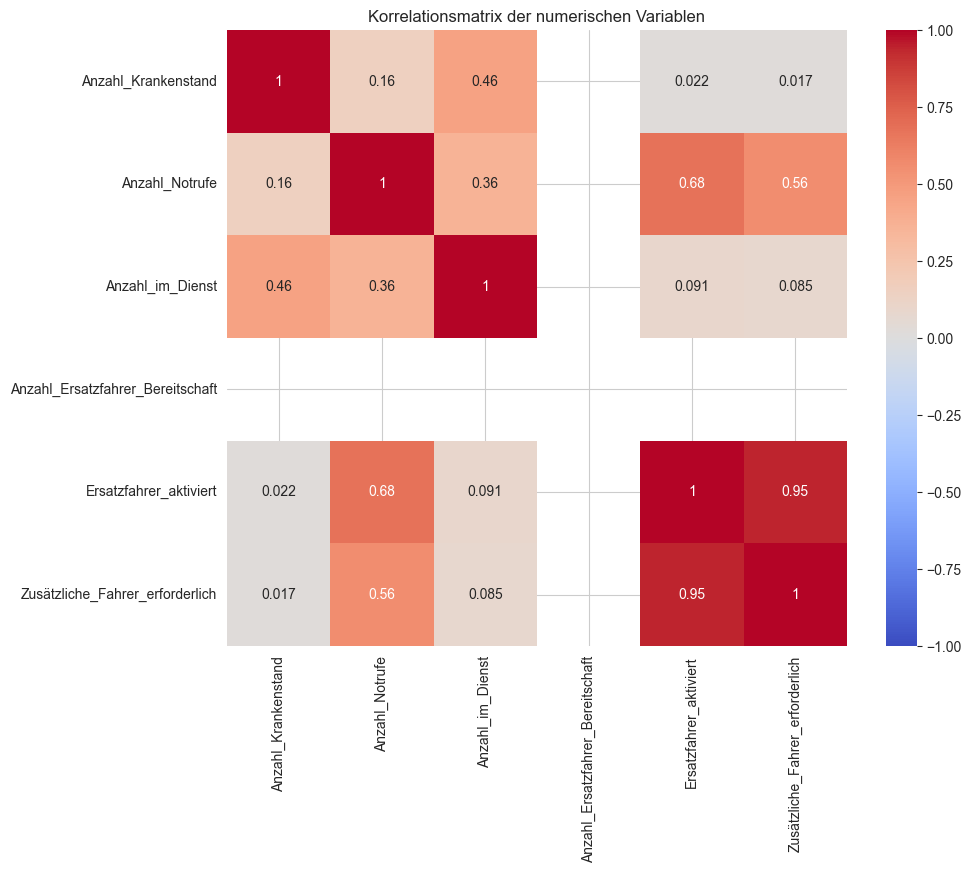

In [16]:
# Berechnen der Korrelationsmatrix
correlation_matrix = df[numeric_columns].corr()

# Visualisieren der Korrelationsmatrix als Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Korrelationsmatrix der numerischen Variablen")
plt.show()

## 1. Hohe Korrelation zwischen Ersatzfahrer_aktiviert und Zusätzliche_Fahrer_erforderlich (0.95)
- Diese beiden Variablen sind stark korreliert, was darauf hindeutet, dass an Tagen, an denen viele Ersatzfahrer aktiviert werden, auch häufig zusätzliche Fahrer benötigt werden.
- **Deutung:** Dies zeigt, dass der Bedarf an zusätzlichen Fahrern eng mit der Aktivierung der Bereitschaftsfahrer verbunden ist. In der Praxis bedeutet dies, dass an Tagen mit höherem Notrufvolumen oder größeren Engpässen zusätzliche Fahrer häufig aktiviert werden müssen, wenn die normalen Ersatzkapazitäten nicht ausreichen.
## 2. Korrelation zwischen Anzahl_Notrufe und Ersatzfahrer_aktiviert (0.68)
- Es besteht eine moderate Korrelation zwischen der Anzahl der Notrufe und der Anzahl der aktivierten Ersatzfahrer.
- **Deutung:** Dies weist darauf hin, dass höhere Notrufzahlen tendenziell zu einem größeren Bedarf an Ersatzfahrern führen. Eine steigende Notrufanzahl erhöht also die Wahrscheinlichkeit, dass zusätzliche Ressourcen aktiviert werden müssen.
## 3. Korrelation zwischen Anzahl_Notrufe und Zusätzliche_Fahrer_erforderlich (0.56)
- Die Anzahl der Notrufe zeigt auch eine moderate Korrelation mit der Anzahl der zusätzlichen Fahrer, die erforderlich sind.
- **Deutung:** Diese Korrelation deutet darauf hin, dass bei höherem Notrufvolumen nicht nur die Ersatzfahrer aktiviert werden, sondern in vielen Fällen auch zusätzliche Fahrer erforderlich sind. Dies spricht für ein zunehmendes Personalbedarfsproblem bei steigender Notrufzahl.
## 4. Korrelation zwischen Anzahl_Krankenstand und Anzahl_im_Dienst (0.46)
- Eine moderate Korrelation zwischen der Anzahl der Krankenstände und der Anzahl der Fahrer im Dienst zeigt, dass mehr Krankenstände im Durchschnitt mit einer höheren Zahl im Dienst befindlicher Fahrer einhergehen.
- **Deutung:** Dies könnte darauf hindeuten, dass bei erhöhtem Krankenstand die reguläre Dienstbesetzung angepasst wird, um Ausfälle zu kompensieren.
## 5. Geringe bis keine Korrelation mit Anzahl_Ersatzfahrer_Bereitschaft
- Die Anzahl_Ersatzfahrer_Bereitschaft ist konstant bei 90, weshalb sie keine Korrelationen mit anderen Variablen zeigt. Diese Zahl wird unabhängig von anderen Faktoren festgelegt.
- **Deutung:** Dies unterstützt die Beobachtung, dass die Anzahl der Bereitschaftsfahrer in der aktuellen Planung starr und unabhängig von saisonalen oder täglichen Schwankungen ist.

# Zeitreihenanalyse mit gleitenden Durchschnitt

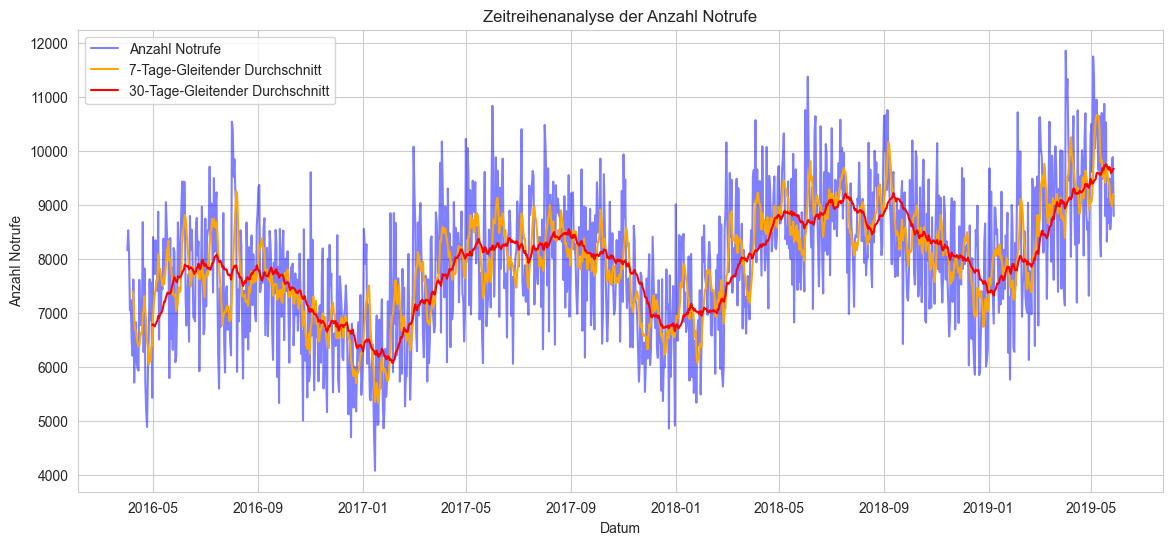

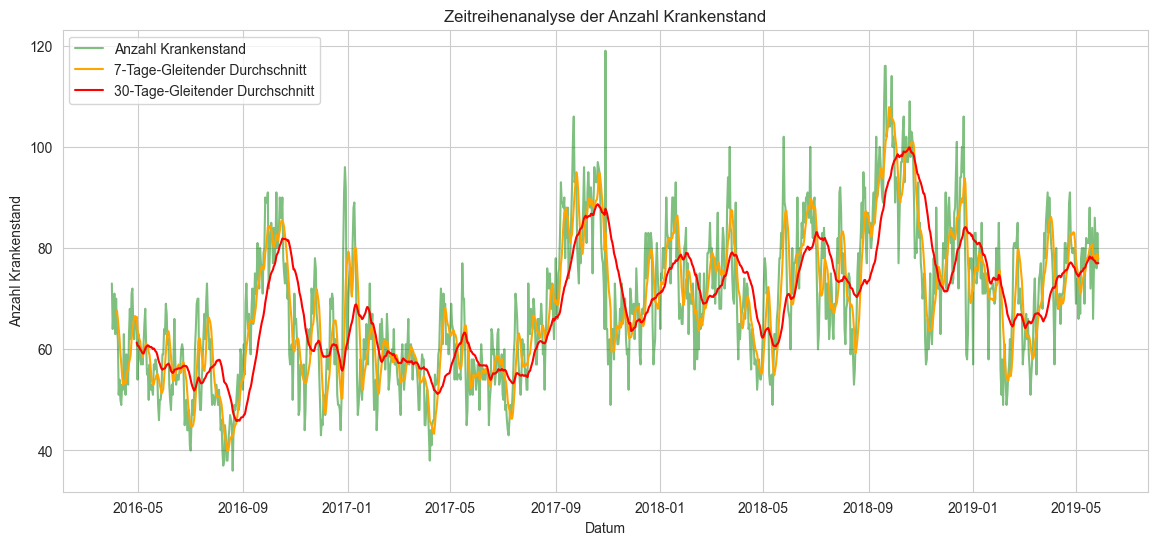

In [17]:
# Sicherstellen, dass das Datum als Index gesetzt ist und sortiert
df = df.set_index('Datum').sort_index()

# Berechnen von 7-Tage- und 30-Tage-Gleitenden Durchschnitten
df['Notrufe_7d_MA'] = df['Anzahl_Notrufe'].rolling(window=7).mean()
df['Notrufe_30d_MA'] = df['Anzahl_Notrufe'].rolling(window=30).mean()
df['Krankenstand_7d_MA'] = df['Anzahl_Krankenstand'].rolling(window=7).mean()
df['Krankenstand_30d_MA'] = df['Anzahl_Krankenstand'].rolling(window=30).mean()

# Plot der Originalwerte und Gleitenden Durchschnitte für Anzahl_Notrufe
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Anzahl_Notrufe'], label='Anzahl Notrufe', color='blue', alpha=0.5)
plt.plot(df.index, df['Notrufe_7d_MA'], label='7-Tage-Gleitender Durchschnitt', color='orange')
plt.plot(df.index, df['Notrufe_30d_MA'], label='30-Tage-Gleitender Durchschnitt', color='red')
plt.title('Zeitreihenanalyse der Anzahl Notrufe')
plt.xlabel('Datum')
plt.ylabel('Anzahl Notrufe')
plt.legend()
plt.show()

# Plot der Originalwerte und Gleitenden Durchschnitte für Anzahl_Krankenstand
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Anzahl_Krankenstand'], label='Anzahl Krankenstand', color='green', alpha=0.5)
plt.plot(df.index, df['Krankenstand_7d_MA'], label='7-Tage-Gleitender Durchschnitt', color='orange')
plt.plot(df.index, df['Krankenstand_30d_MA'], label='30-Tage-Gleitender Durchschnitt', color='red')
plt.title('Zeitreihenanalyse der Anzahl Krankenstand')
plt.xlabel('Datum')
plt.ylabel('Anzahl Krankenstand')
plt.legend()
plt.show()

## 1. Anzahl Notrufe
- **Kurzfristige Schwankungen:** Die blaue Linie (tägliche Notrufzahlen) zeigt deutliche tägliche Schwankungen, die auf zufällige oder tageszeitliche Ereignisse hindeuten. Es gibt regelmäßige Spitzen, die kurzfristige Schwankungen widerspiegeln.
- **7-Tage-Gleitender Durchschnitt (orange):** Der 7-Tage-Durchschnitt glättet diese täglichen Schwankungen und gibt einen besseren Überblick über die wöchentliche Variabilität. Hier sind kleinere Spitzen und Täler sichtbar, die möglicherweise auf wöchentliche Muster hindeuten.
- **30-Tage-Gleitender Durchschnitt (rot):** Der 30-Tage-Durchschnitt zeigt die längerfristigen Trends. Wir erkennen hier deutliche saisonale Schwankungen:
    - Im Sommer und Frühherbst steigen die Notrufzahlen regelmäßig an, was vermutlich auf mehr Aktivität im Freien und damit verbundenen Unfällen hinweist.
    - Die Notrufzahlen sinken tendenziell im Spätwinter und zu Jahresbeginn, was weniger Aktivität im Freien und möglicherweise weniger Unfallgeschehen widerspiegeln könnte.
## 2. Anzahl Krankenstand
- **Kurzfristige Schwankungen:** Die grüne Linie zeigt die täglichen Krankenstände, die auch deutliche Schwankungen aufweisen. Spitzenwerte und Einbrüche deuten darauf hin, dass sich die Krankenstände möglicherweise kurzfristig ändern, z. B. durch saisonale Krankheiten.
- **7-Tage-Gleitender Durchschnitt (orange):** Der 7-Tage-Durchschnitt glättet die täglichen Schwankungen und zeigt kleinere Zyklen, die eventuell auf wöchentliche Effekte hinweisen.
- **30-Tage-Gleitender Durchschnitt (rot):** Der 30-Tage-Durchschnitt verdeutlicht saisonale Muster, insbesondere:
    - Ein starker Anstieg der Krankenstände in den Herbst- und Wintermonaten, vermutlich verursacht durch saisonale Erkrankungen wie Grippe.
    - Im Frühling und Sommer sinkt der Krankenstand, was auf weniger saisonale Erkrankungen in dieser Zeit hinweist.

# Autokorrelation von Variablen

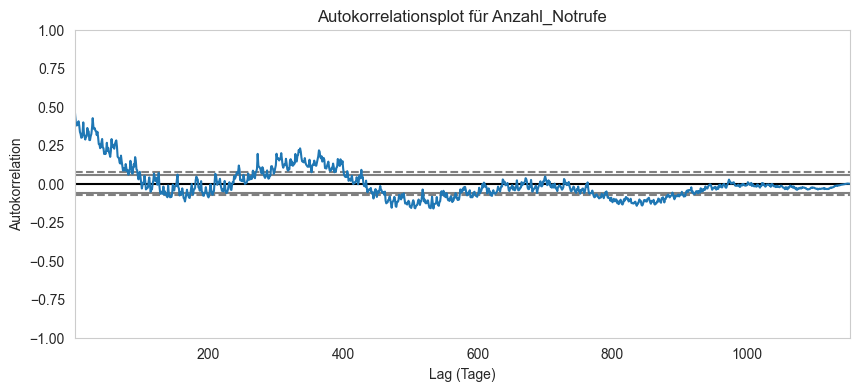

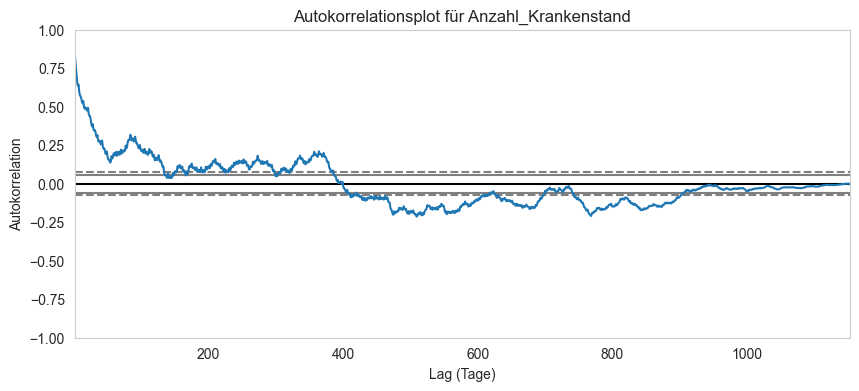

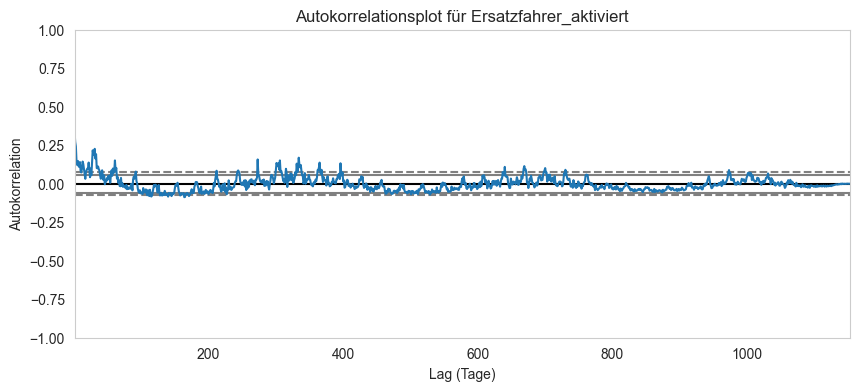

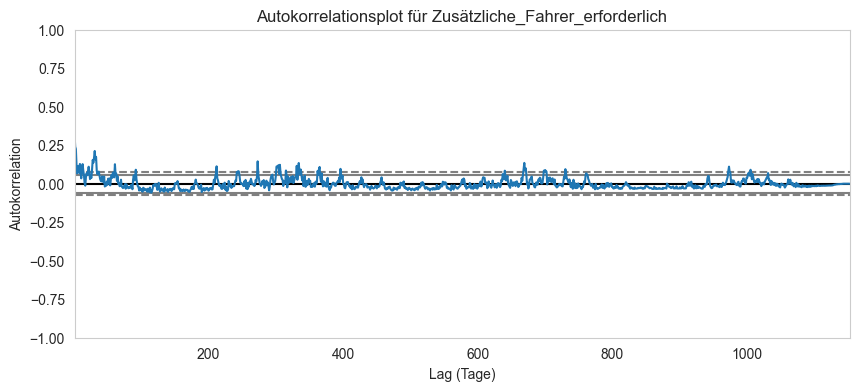

In [18]:
# Liste der Variablen, die analysiert werden sollen
variables_to_analyze = ['Anzahl_Notrufe', 'Anzahl_Krankenstand', 'Ersatzfahrer_aktiviert', 'Zusätzliche_Fahrer_erforderlich']

# Autokorrelationsplots für ausgewählte Variablen
for var in variables_to_analyze:
    plt.figure(figsize=(10, 4))
    autocorrelation_plot(df[var])
    plt.title(f'Autokorrelationsplot für {var}')
    plt.xlabel('Lag (Tage)')
    plt.ylabel('Autokorrelation')
    plt.show()


## 1. Anzahl_Notrufe
- **Beobachtungen:** Zu Beginn (Lags von 1 bis etwa 50 Tage) ist eine moderate Autokorrelation vorhanden, die dann relativ schnell abnimmt. Nach ungefähr 100 Lags bleibt die Autokorrelation nahe Null.
- **Interpretation:** Dies deutet darauf hin, dass die Anzahl der Notrufe in gewissem Maße durch den vorangegangenen Tag oder wenige Tage zuvor beeinflusst wird. Ein stark saisonaler oder wöchentlicher Zyklus ist jedoch nicht klar erkennbar, da die Autokorrelation schnell abnimmt. Es könnten kurzfristige Trends oder zufällige Schwankungen vorliegen, die nur über kurze Zeiträume bestehen.
## 2. Anzahl_Krankenstand
- **Beobachtungen:** Auch hier gibt es eine moderate Anfangskorrelation, die relativ schnell abnimmt. Danach schwankt die Autokorrelation um Null, mit gelegentlichen Ausschlägen, aber ohne starke Periodizität.
- **Interpretation:** Die Krankenstände zeigen ebenfalls eine gewisse kurzfristige Korrelation, was auf einen Einfluss der Krankenstände in den unmittelbar vorherigen Tagen hinweist. Diese Autokorrelation könnte auf Faktoren wie ansteckende Krankheiten hinweisen, die kurzfristige Effekte verursachen. Langfristige oder saisonale Muster scheinen jedoch nicht stark ausgeprägt zu sein.
## 3. Ersatzfahrer_aktiviert
- **Beobachtungen:** Die Autokorrelation ist am Anfang recht niedrig und bleibt stabil nahe Null über alle Lags hinweg.
- **Interpretation:** Die Anzahl der aktivierten Ersatzfahrer scheint keine zeitliche Abhängigkeit von vorhergehenden Tagen aufzuweisen. Dies könnte bedeuten, dass der Bedarf an aktivierten Ersatzfahrern eher durch tagesaktuelle Ereignisse oder Schwankungen bestimmt wird und nicht durch einen konstanten Trend oder zyklische Muster.
## 4. Zusätzliche_Fahrer_erforderlich
- **Beobachtungen:** Ähnlich wie bei Ersatzfahrer_aktiviert bleibt die Autokorrelation in allen Lags nahe Null, was darauf hindeutet, dass keine starke zeitliche Abhängigkeit besteht.
- **Interpretation:** Die benötigten zusätzlichen Fahrer sind vermutlich ebenfalls stark von tagesaktuellen Faktoren abhängig und zeigen keine klare Abhängigkeit zu den Werten der Vortage. Die geringe Autokorrelation deutet darauf hin, dass unvorhersehbare Ereignisse oder kurzfristige Engpässe zu einem variierenden Bedarf führen.

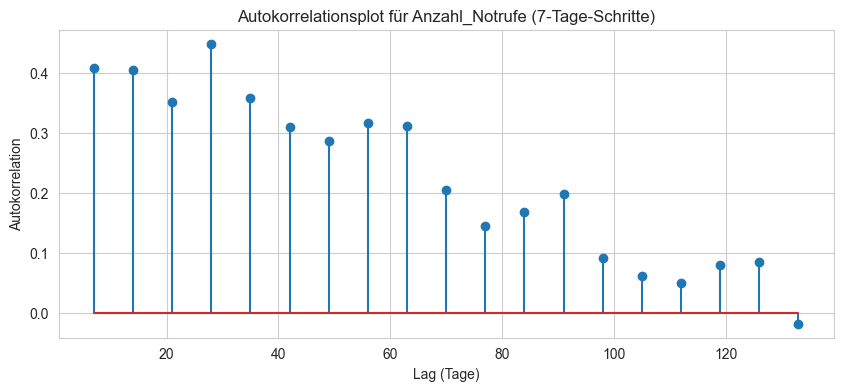

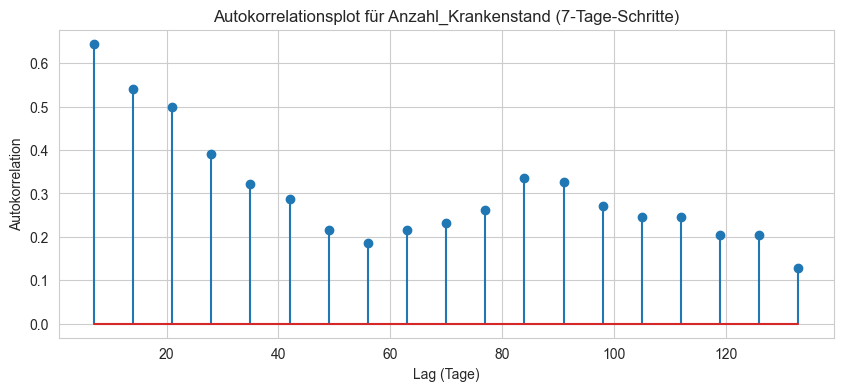

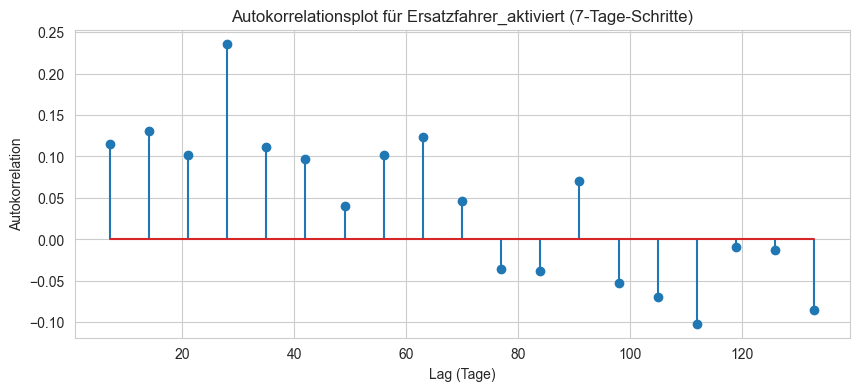

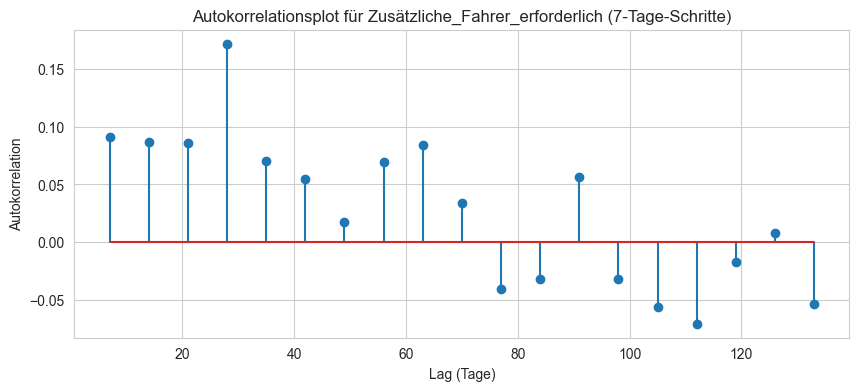

In [20]:
# Liste der Variablen, die analysiert werden sollen
variables_to_analyze = ['Anzahl_Notrufe', 'Anzahl_Krankenstand', 'Ersatzfahrer_aktiviert', 'Zusätzliche_Fahrer_erforderlich']

# Autokorrelationsplots für ausgewählte Variablen nur für 7-Tage-Schritte
for var in variables_to_analyze:
    plt.figure(figsize=(10, 4))
    
    # Berechne Autokorrelationen nur für Lags im 7-Tage-Schritt
    lags = [7 * i for i in range(1, 20)]  # 7, 14, 21, ..., 133 Tage
    autocorrelations = [df[var].autocorr(lag=lag) for lag in lags]
    
    # Plot
    plt.stem(lags, autocorrelations)
    plt.title(f'Autokorrelationsplot für {var} (7-Tage-Schritte)')
    plt.xlabel('Lag (Tage)')
    plt.ylabel('Autokorrelation')
    plt.show()


# 1. Anzahl_Notrufe
- **Beobachtungen:** Die Autokorrelation ist bei den ersten Lags (7, 14, 21 Tage) relativ stark, wobei die Korrelation mit zunehmendem Lag abnimmt. Auch bei einem Lag von 7 Tagen ist die Autokorrelation über 0.4, was auf eine wöchentliche Zyklizität hinweist.
- **Interpretation:** Die Anzahl der Notrufe zeigt eine deutliche wöchentliche Wiederholung. Dies deutet darauf hin, dass bestimmte Tage der Woche durchgängig höhere oder niedrigere Notrufzahlen aufweisen. Diese wöchentliche Schwankung könnte für die Einsatzplanung wichtig sein, um Spitzen besser vorherzusagen.
# 2. Anzahl_Krankenstand
- **Beobachtungen:** Die Autokorrelation ist bei einem Lag von 7 Tagen am höchsten (über 0.6) und nimmt bei höheren Lags (14, 21, 28 Tage usw.) kontinuierlich ab, bleibt jedoch bis zu etwa 70 Tagen teilweise relevant.
- **Interpretation:** Auch die Krankenstände zeigen eine deutliche wöchentliche Wiederholung, was möglicherweise mit festgelegten Arbeitszeiten und typischen Erholungsphasen der Einsatzkräfte zusammenhängt. Ein wöchentlicher Trend könnte auch durch saisonale Krankheitsmuster beeinflusst sein.
# 3. Ersatzfahrer_aktiviert
- **Beobachtungen:** Die Autokorrelation ist hier insgesamt schwächer, zeigt aber bei 7 und 14 Tagen kleine positive Werte und einige schwächere negative Werte bei längeren Lags.
- **Interpretation:** Die Anzahl der aktivierten Ersatzfahrer weist keine starke wöchentliche Struktur auf. Die Schwankungen könnten durch kurzfristige und tagesabhängige Faktoren bestimmt sein, was eine dynamische und tagesgenaue Planung nahelegt.
# 4. Zusätzliche_Fahrer_erforderlich
- **Beobachtungen:** Die Autokorrelation ist hier insgesamt schwach, mit niedrigen positiven Werten bei 7 und 14 Tagen und einigen negativen Werten bei höheren Lags.
- **Interpretation:** Auch die zusätzlichen benötigten Fahrer zeigen keine starke wöchentliche oder zyklische Abhängigkeit. Dies könnte darauf hindeuten, dass der Bedarf an zusätzlichen Fahrern unregelmäßig ist und eher auf tagesaktuellen Notwendigkeiten basiert.

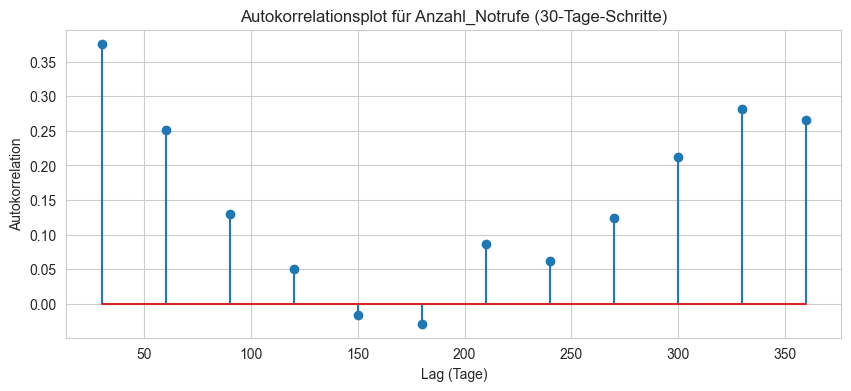

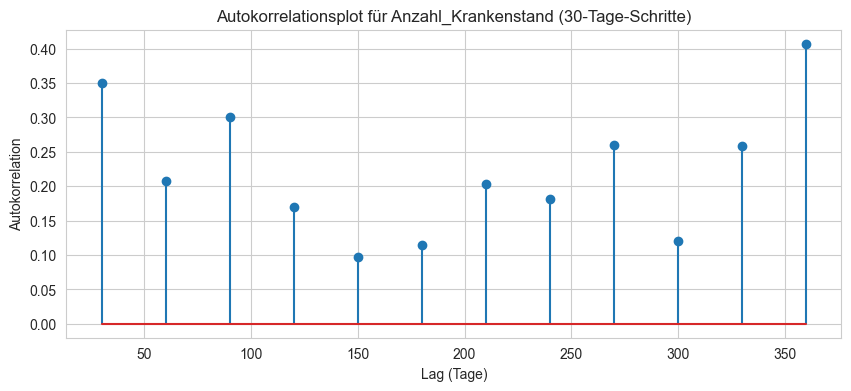

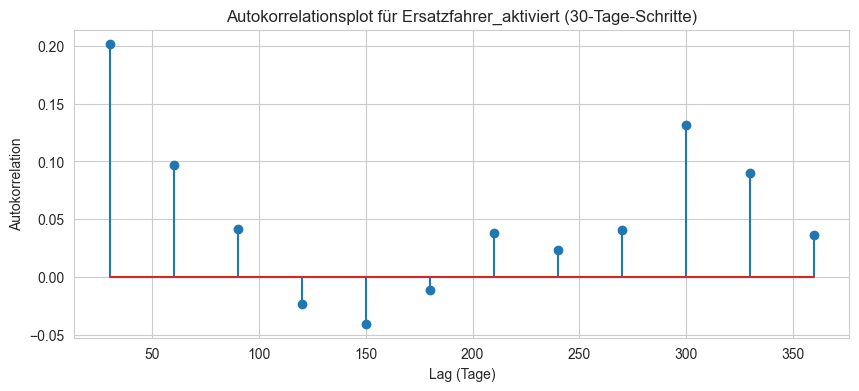

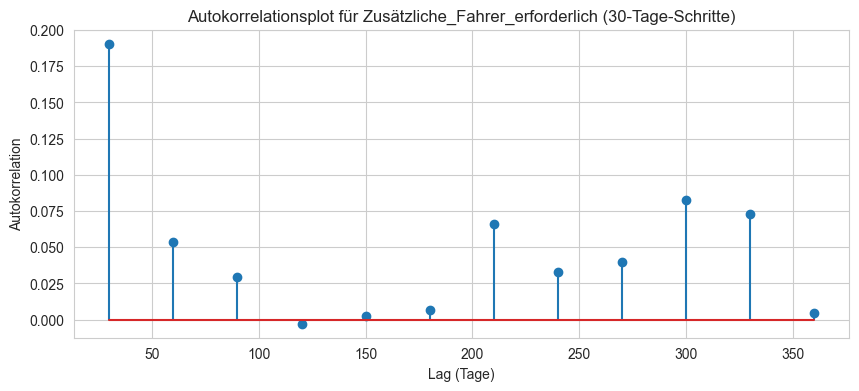

In [21]:
# Liste der Variablen, die analysiert werden sollen
variables_to_analyze = ['Anzahl_Notrufe', 'Anzahl_Krankenstand', 'Ersatzfahrer_aktiviert', 'Zusätzliche_Fahrer_erforderlich']

# Autokorrelationsplots für ausgewählte Variablen nur für 30-Tage-Schritte
for var in variables_to_analyze:
    plt.figure(figsize=(10, 4))
    
    # Berechne Autokorrelationen nur für Lags im 30-Tage-Schritt
    lags = [30 * i for i in range(1, 13)]  # 30, 60, 90, ..., 360 Tage
    autocorrelations = [df[var].autocorr(lag=lag) for lag in lags]
    
    # Plot als Stabdiagramm ohne `use_line_collection`
    plt.stem(lags, autocorrelations)
    plt.title(f'Autokorrelationsplot für {var} (30-Tage-Schritte)')
    plt.xlabel('Lag (Tage)')
    plt.ylabel('Autokorrelation')
    plt.show()

# 1. Anzahl_Notrufe
- **Beobachtungen:** Die Autokorrelation ist bei den ersten 30 Tagen am höchsten (über 0.35) und nimmt danach relativ schnell ab. Es gibt jedoch auch leicht positive Werte bei Lags von etwa 300 und 360 Tagen, die auf jährliche Wiederholungen hinweisen könnten.
- **Interpretation:** Die Anzahl der Notrufe zeigt eine gewisse monatliche und möglicherweise auch jährliche Saisonalität. Die wiederholte Autokorrelation in längeren Intervallen deutet darauf hin, dass Notrufspitzen zu bestimmten Jahreszeiten häufiger auftreten.
# 2. Anzahl_Krankenstand
- **Beobachtungen:** Ähnlich wie bei den Notrufen zeigt die Krankenstand-Variable eine hohe Autokorrelation bei 30 Tagen (über 0.4) und abnehmende Werte bei den weiteren Lags. Bei Lags von 300 und 360 Tagen zeigt sich ebenfalls eine erhöhte Korrelation.
- **Interpretation:** Auch hier ist eine monatliche Saisonalität erkennbar, die möglicherweise auf einen Zusammenhang mit wiederkehrenden Krankheiten (z. B. Grippewellen) hinweist. Die jährliche Komponente könnte ebenfalls eine Rolle spielen, da saisonale Erkrankungen in bestimmten Monaten gehäuft auftreten.
# 3. Ersatzfahrer_aktiviert
- **Beobachtungen:** Die Autokorrelation bei einem Lag von 30 Tagen ist hier relativ niedrig (etwa 0.2) und nimmt bei längeren Lags weiter ab. Es gibt leichte positive Korrelationen bei 300 und 360 Tagen, jedoch sind diese viel schwächer als bei den Notrufen und Krankenständen.
- **Interpretation:** Die schwachen Korrelationen deuten darauf hin, dass der Bedarf an aktivierten Ersatzfahrern nicht stark von monatlichen oder jährlichen Trends beeinflusst wird. Möglicherweise hängen die täglichen Einsätze eher von aktuellen Notwendigkeiten und weniger von saisonalen Schwankungen ab.
# 4. Zusätzliche_Fahrer_erforderlich
- **Beobachtungen:** Auch hier zeigt sich eine geringe Autokorrelation bei 30 Tagen (etwa 0.2) mit noch schwächeren Werten bei weiteren Lags. Die Lags von 300 und 360 Tagen zeigen nur eine sehr leichte positive Korrelation.
- **Interpretation:** Ähnlich wie bei den aktivierten Ersatzfahrern gibt es keine signifikanten monatlichen oder jährlichen Trends in der Anzahl der zusätzlichen Fahrer. Dies deutet darauf hin, dass diese Variable tendenziell weniger von saisonalen Mustern beeinflusst wird und eher tagesaktuelle Entscheidungen widerspiegelt.